# **Pre processing Dataset**

In [47]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ProbablyItsSpirit/Taufa-Gift_Recommender_System/refs/heads/main/(Kaggle)%20amazon_product_dataset_2020.csv")

### Removing unwanted coloumns

In [48]:
columns_to_keep = ["Uniq Id", "Product Name", "Category", "Selling Price", "Product Url"]
df = df[columns_to_keep].copy()


### Renaming Coloumns

In [50]:
df.rename(columns={
    "Uniq Id": "Uid",
    "Product Name": "Name",
    "Selling Price": "Price",
    "Product Url": "Link"
}, inplace=True)

### Handling missing values

In [51]:
df.dropna(axis=1, thresh=len(df) * 0.3, inplace=True)
df["Category"] = df["Category"].fillna("Unknown")


In [52]:
df["Price"] = df["Price"].str.extract(r'(\d+\.\d+)')
df["Price"] = df["Price"].astype(float)


### Adding an 'Age Group' column

In [53]:
def assign_age_group(category):
    category = str(category)
    if "Toys" in category or "Games" in category:
        return "8-12 years"
    elif "Electronics" in category or "Gadgets" in category:
        return "13+ years"
    else:
        return "General"

df["Age Group"] = df["Category"].apply(assign_age_group)


### Generating Uid

In [55]:
def generate_uid(index, category):
    category = str(category).lower()
    if "toys" in category or "games" in category:
        prefix = "T"
    elif "electronics" in category or "gadgets" in category:
        prefix = "E"
    elif "sports" in category or "outdoor" in category:
        prefix = "S"
    else:
        prefix = "G"

    return f"{prefix}{str(index+1).zfill(3)}"

df["Uid"] = [generate_uid(i, cat) for i, cat in enumerate(df["Category"])]


In [57]:
df.head()

,Uid,Name,Category,Price,Link,Age Group
0,S001,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",Sports & Outdoors | Outdoor Recreation | Skate...,237.68,https://www.amazon.com/DB-Longboards-CoreFlex-...,General
1,T002,"Electronic Snap Circuits Mini Kits Classpack, ...",Toys & Games | Learning & Education | Science ...,99.95,https://www.amazon.com/Electronic-Circuits-Cla...,8-12 years
2,T003,3Doodler Create Flexy 3D Printing Filament Ref...,Toys & Games | Arts & Crafts | Craft Kits,34.99,https://www.amazon.com/3Doodler-Plastic-Innova...,8-12 years
3,T004,Guillow Airplane Design Studio with Travel Cas...,Toys & Games | Hobbies | Models & Model Kits |...,28.91,https://www.amazon.com/Guillow-Airplane-Design...,8-12 years
4,T005,Woodstock- Collage 500 pc Puzzle,Toys & Games | Puzzles | Jigsaw Puzzles,17.49,https://www.amazon.com/Woodstock-Collage-500-p...,8-12 years


# **Analysis**

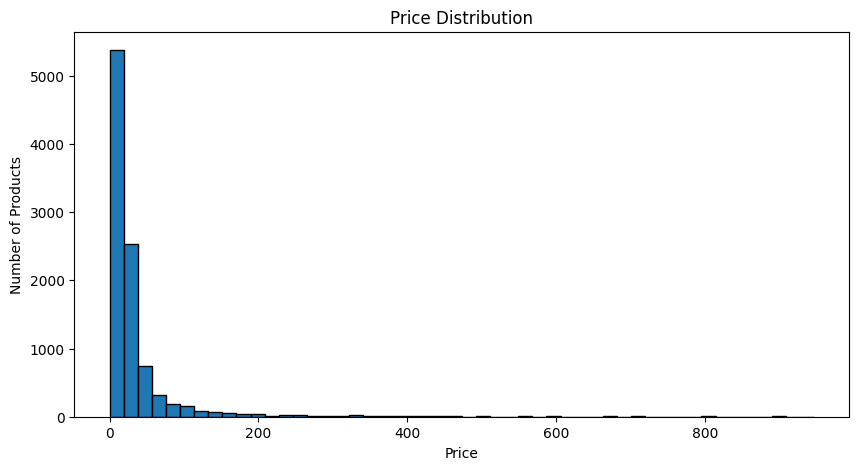

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df["Price"].plot(kind="hist", bins=50, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.title("Price Distribution")
plt.show()


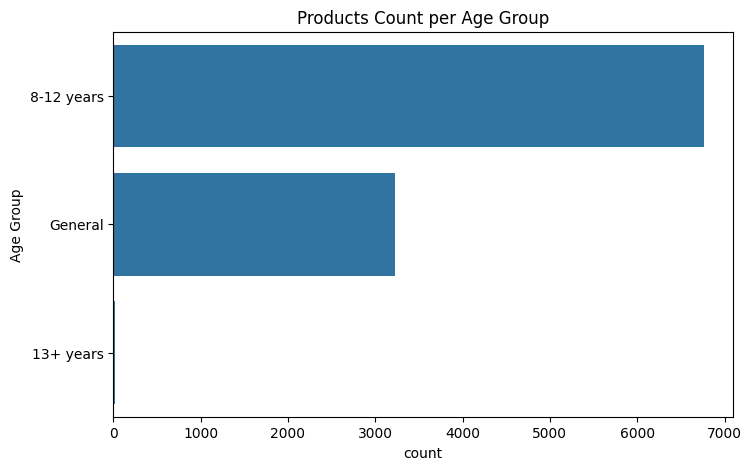

In [64]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(y=df["Age Group"], order=df["Age Group"].value_counts().index)
plt.title("Products Count per Age Group")
plt.show()
